# Exploratory Data Analysis

## Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

## Simple Stats

#### Listings DF

In [10]:
# read in cleaned csv
listings_df = pd.read_csv('../data/cleaned_listings.csv').drop(columns = 'Unnamed: 0')

# check first 5 rows
listings_df.head(1)

/var/folders/bl/639jfgnd3jb_3b76z0p4htl40000gn/T/ipykernel_17985/3220093407.py:2: DtypeWarning: Columns (1,3,10,35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('../data/cleaned_listings.csv').drop(columns = 'Unnamed: 0')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595.0,https://www.airbnb.com/rooms/2595,20221204162430.0,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.63,4.77,4.8,4.81,4.4,3.0,3.0,0.0,0.0,0.31


In [11]:
listings_df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,4.153500e+04,41535.000000,...,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000,41535.000000
mean,86.601613,136.240231,40.760243,-73.901530,2.957987,1.253617,1.611581,18.590875,5.323913e+04,18.633345,...,3.536364,3.674324,3.672509,3.613908,3.544668,20.625761,11.309570,9.198050,0.053810,0.989906
std,518.303440,773.449674,5.560525,6.285929,2.078639,0.857868,1.225468,30.699623,1.053805e+07,32.389514,...,2.025175,2.079821,2.080749,2.046494,2.022244,68.872897,56.445366,40.091974,0.590994,1.784391
min,0.000000,0.000000,0.000000,-74.249840,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.687745,-73.982400,2.000000,1.000000,1.000000,2.000000,6.000000e+01,2.000000,...,3.000000,3.500000,3.500000,3.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.020000
50%,2.000000,3.000000,40.723830,-73.953150,2.000000,1.000000,1.000000,10.000000,3.650000e+02,7.000000,...,4.660000,4.880000,4.880000,4.740000,4.670000,1.000000,1.000000,0.000000,0.000000,0.260000
75%,5.000000,7.000000,40.762200,-73.924990,4.000000,1.000000,2.000000,30.000000,1.125000e+03,30.000000,...,4.930000,5.000000,5.000000,5.000000,4.880000,4.000000,1.000000,2.000000,0.000000,1.350000
max,4559.000000,12017.000000,1125.000000,1125.000000,16.000000,47.000000,77.000000,1250.000000,2.147484e+09,1250.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,487.000000,487.000000,345.000000,15.000000,102.980000


In [12]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41535 entries, 0 to 41534
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            41535 non-null  object 
 1   listing_url                                   41535 non-null  object 
 2   scrape_id                                     41535 non-null  object 
 3   last_scraped                                  41535 non-null  object 
 4   source                                        41535 non-null  object 
 5   name                                          41535 non-null  object 
 6   description                                   41535 non-null  object 
 7   neighborhood_overview                         41535 non-null  object 
 8   picture_url                                   41535 non-null  object 
 9   host_id                                       41535 non-null 

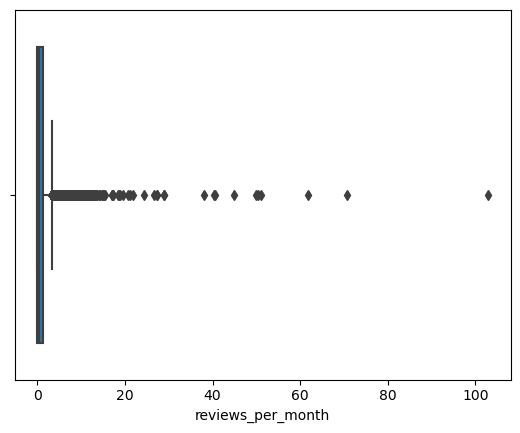

<Figure size 640x480 with 0 Axes>

In [18]:
# box plot of lot area to find outliers for numeric x variable - reviews_per_month
sns.boxplot(x = listings_df['reviews_per_month'])

plt.show()

plt.savefig('../images/reviews_per_month.png');

##### Note: 1 major outlier of over 100 reviews per month, but we will also see some outliers for 40 - 80 reviews per month.

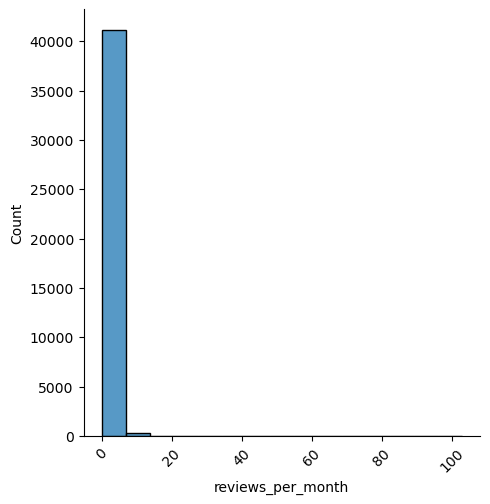

<Figure size 640x480 with 0 Axes>

In [14]:
# distribution plot of reviews per month
sns.displot(listings_df['reviews_per_month'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

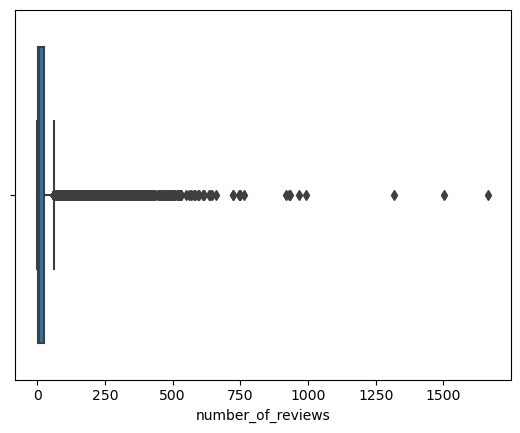

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(x = listings_df['number_of_reviews'])

plt.show()

plt.tight_layout()
plt.savefig('../images/number_of_reviews.png');

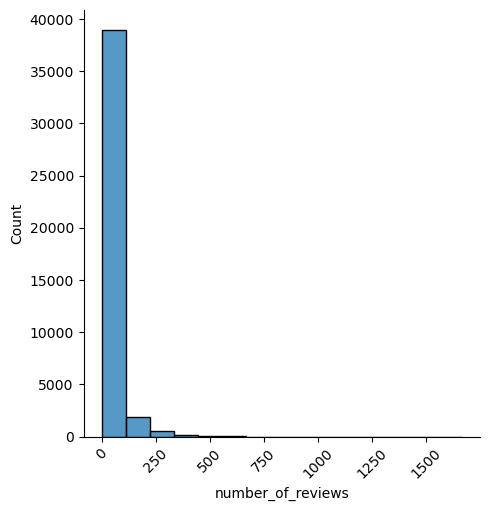

In [16]:
# distribution plot of total number of reviews
sns.displot(listings_df['number_of_reviews'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

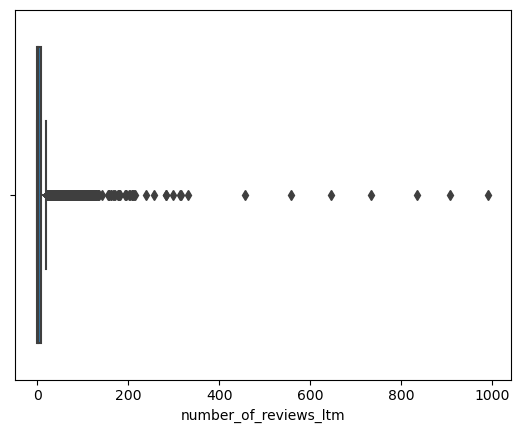

<Figure size 640x480 with 0 Axes>

In [20]:
sns.boxplot(x = listings_df['number_of_reviews_ltm'])

plt.show()

plt.savefig('../images/number_of_reviews_ltm.png');

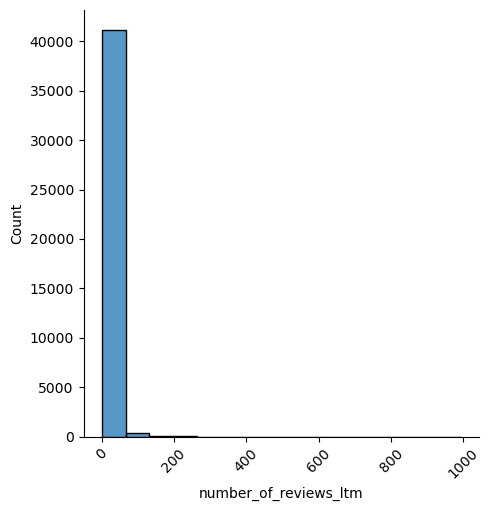

In [10]:
# distribution plot of number of reviews in the last twelve months
sns.displot(listings_df['number_of_reviews_ltm'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

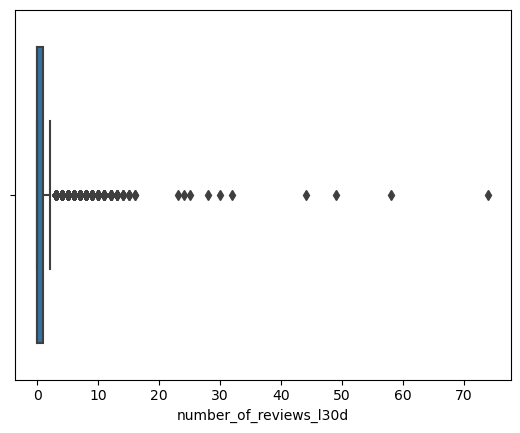

<Figure size 640x480 with 0 Axes>

In [21]:
sns.boxplot(x = listings_df['number_of_reviews_l30d'])

plt.show()

plt.savefig('../images/number_of_reviews_l30d.png');

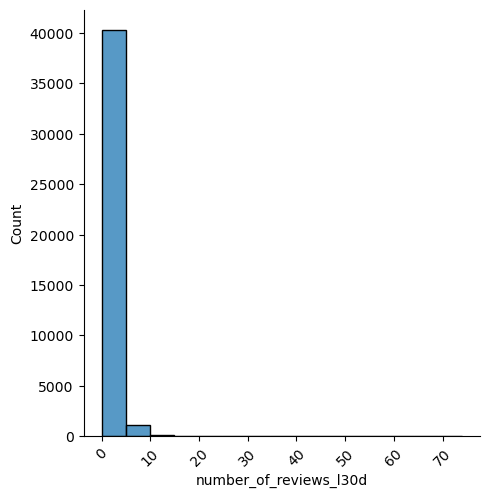

In [12]:
# distribution plot of number of reviews in the last 30 days
sns.displot(listings_df['number_of_reviews_l30d'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

##### Questions:
* which months are most likely to generate reviews? 
* Is there correlation for volume of bookings per month and number of reviews left per month?

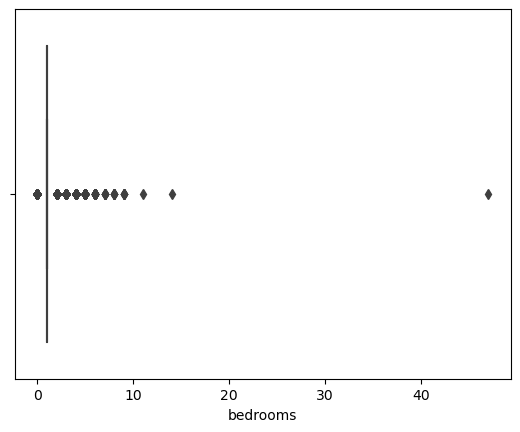

<Figure size 640x480 with 0 Axes>

In [22]:
# box plot of lot area to find outliers for numeric x variable - bedrooms
sns.boxplot(x = listings_df['bedrooms'])

plt.show()

plt.savefig('../images/bedrooms.png');

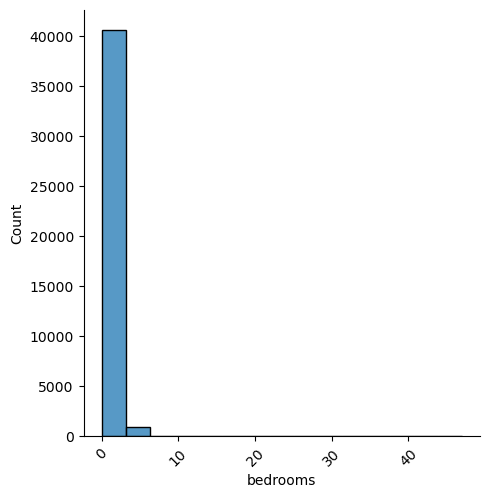

In [14]:
# distribution plot of number of bedrooms
sns.displot(listings_df['bedrooms'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

##### Note: An outlier of 40 bedrooms. Do they all accommodate 1 person each, or do some bedrooms not accommodate anyone?

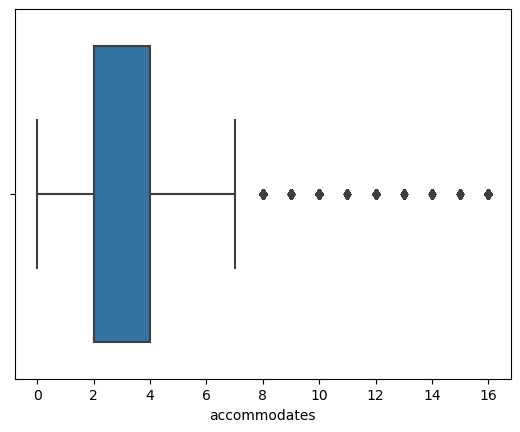

<Figure size 640x480 with 0 Axes>

In [23]:
# box plot to find outliers for numeric x variable - accommodates
sns.boxplot(x = listings_df['accommodates'])

plt.show()

plt.savefig('../images/accommodates.png');

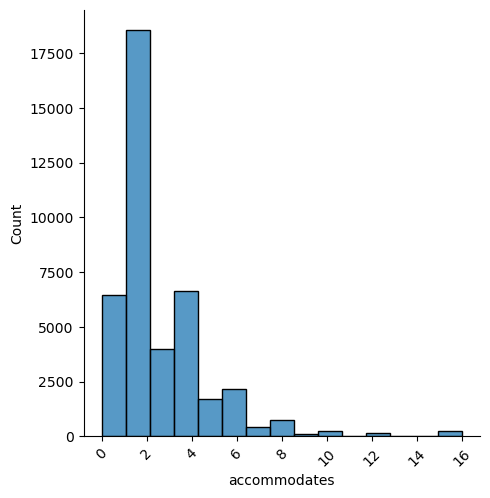

In [16]:
# distribution plot of how many people each listing accommodates
sns.displot(listings_df['accommodates'],
            bins = 15
           )
plt.xticks(rotation = 45)
plt.show()

##### Note: Standard accommodation is 2-4 people, but there are outliers for more. It's interesting that the largest outlier is 16 people when we saw in an earlier box plot that there's one listing that has 40 bedrooms. Maybe this means some of those bedrooms don't actually have beds and are used as office space or even as spare rooms.

--- 

#### Reviews DF

In [2]:
# read in cleaned csv
reviews_df = pd.read_csv('../data/cleaned_reviews.csv').drop(columns = 'Unnamed: 0')

# check first 5 rows
reviews_df.head(1)

,date,reviewer_name,comments,listing_id,id,reviewer_id
0,2009-04-23,Pamela,"Artwork, indeed! The walls are covered with dr...",5803.0,1743.0,9868.0


In [3]:
reviews_df.describe()

,listing_id,id,reviewer_id
count,1.098459e+06,1.098459e+06,1.098459e+06
mean,3.773435e+16,2.411801e+17,1.349447e+08
std,1.501274e+17,3.060031e+17,1.315644e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.654931e+06,2.729818e+08,2.663955e+07
50%,2.150359e+07,5.973990e+08,8.879233e+07
75%,4.098671e+07,5.811176e+17,2.105154e+08
max,7.732903e+17,7.747240e+17,4.898917e+08


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098459 entries, 0 to 1098458
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1098459 non-null  object 
 1   reviewer_name  1098459 non-null  object 
 2   comments       1098459 non-null  object 
 3   listing_id     1098459 non-null  float64
 4   id             1098459 non-null  float64
 5   reviewer_id    1098459 non-null  float64
dtypes: float64(3), object(3)
memory usage: 50.3+ MB


---

#### NLP

In [2]:
# read in cleaned csv
reviews_df = pd.read_csv('../data/cleaned_reviews.csv').drop(columns = 'Unnamed: 0')

# check first 5 rows
reviews_df.head()

,date,reviewer_name,comments,listing_id,id,reviewer_id
0,2009-04-23,Pamela,"Artwork, indeed! The walls are covered with dr...",5803.0,1743.0,9868.0
1,2009-11-21,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,2595.0,17857.0,50679.0
2,2009-12-05,Cate,Great experience.,2595.0,19176.0,53267.0
3,2009-12-10,Anita,I've stayed with my friend at the Midtown Cast...,2595.0,19760.0,38960.0
4,2010-04-09,Kai-Uwe,"We've been staying here for about 9 nights, en...",2595.0,34320.0,71130.0


In [3]:
reviews_df.shape

(1098459, 6)

In [4]:
# check first row in 'comments' column
reviews_df['comments'][0]

'Artwork, indeed! The walls are covered with drawings by Maurice Sendak, Steven Kellogg, among others. It was quiet. Breakfast was ample. Batman and Robin were very affectionate. We plan to return again. Thanks, Laurie!'

In [5]:
# check last
reviews_df['comments'][1098458]

'Departamento bien equipado, el anfitrion estuvo pendiente de nuestra estancia, muy buena opcion'

In [6]:
# find length of first row
len(reviews_df['comments'][0])

218

In [7]:
# find length of last row
len(reviews_df['comments'][1098458])

95

In [8]:
# create new column for comment length
reviews_df['comment_length'] = reviews_df['comments'].apply(len)

In [9]:
# check
reviews_df.head()

,date,reviewer_name,comments,listing_id,id,reviewer_id,comment_length
0,2009-04-23,Pamela,"Artwork, indeed! The walls are covered with dr...",5803.0,1743.0,9868.0,218
1,2009-11-21,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,2595.0,17857.0,50679.0,731
2,2009-12-05,Cate,Great experience.,2595.0,19176.0,53267.0,17
3,2009-12-10,Anita,I've stayed with my friend at the Midtown Cast...,2595.0,19760.0,38960.0,475
4,2010-04-09,Kai-Uwe,"We've been staying here for about 9 nights, en...",2595.0,34320.0,71130.0,366


##### Word Count

In [10]:
# get word count for first row of comments
len(reviews_df['comments'][0].split())

34

In [11]:
# get word count for last row of comments
len(reviews_df['comments'][1098458].split())

13

In [12]:
# create new column for comments word count
reviews_df['comment_word_count'] = reviews_df['comments'].apply(lambda x: len(x.split()))

In [13]:
# check
reviews_df.head()

,date,reviewer_name,comments,listing_id,id,reviewer_id,comment_length,comment_word_count
0,2009-04-23,Pamela,"Artwork, indeed! The walls are covered with dr...",5803.0,1743.0,9868.0,218,34
1,2009-11-21,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,2595.0,17857.0,50679.0,731,124
2,2009-12-05,Cate,Great experience.,2595.0,19176.0,53267.0,17,2
3,2009-12-10,Anita,I've stayed with my friend at the Midtown Cast...,2595.0,19760.0,38960.0,475,90
4,2010-04-09,Kai-Uwe,"We've been staying here for about 9 nights, en...",2595.0,34320.0,71130.0,366,66


In [14]:
# summary stats on the columns we just made
reviews_df[['comment_length', 'comment_word_count']].describe()

,comment_length,comment_word_count
count,1.098459e+06,1.098459e+06
mean,2.530091e+02,4.445340e+01
std,2.733963e+02,4.896481e+01
min,1.000000e+00,0.000000e+00
25%,8.300000e+01,1.400000e+01
50%,1.770000e+02,3.100000e+01
75%,3.300000e+02,5.800000e+01
max,6.224000e+03,1.000000e+03


#### N - Grams

In [3]:
shortened = reviews_df['comments'].head(10000)

##### Top Words

In [4]:
# source: breakfast hour notebook 1/10
# top words for 'comments' column
cv = CountVectorizer(stop_words = 'english')

comments_vect = cv.fit_transform(shortened)
comments_vect_df = pd.DataFrame(comments_vect.todense(), columns = cv.get_feature_names_out())

In [5]:
# Take a look at the top 10 words for 'comments'
comments_vect_df.sum().sort_values(ascending = False).head(10)

br           8688
great        6090
stay         4732
place        4689
apartment    4285
location     3092
host         2608
room         2512
clean        2413
nice         2287
dtype: int64

##### Top Bigrams

In [6]:
# top bigrams for 'comments'
cv = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))

bi_vect = cv.fit_transform(shortened)
bi_vect_df = pd.DataFrame(bi_vect.todense(), columns = cv.get_feature_names_out())

In [7]:
# Take a look at the top 10 bigrams for 'comments'
bi_vect_df.sum().sort_values(ascending = False).head(10)

br br               2504
new york            1039
great location       837
highly recommend     550
place stay           550
great host           510
great place          432
definitely stay      384
walking distance     377
central park         309
dtype: int64